In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_without_outliers.csv')

X=df.drop(columns=['class'])
y=df['class']

train_split_ratio=0.8
train_rows=round(X.shape[0]*train_split_ratio)


df['class'].replace("UP", 1, inplace=True)   
df['class'].replace("DOWN", 0, inplace=True)
df=df.drop(columns=['id','date'])


train=df[:train_rows]
test=df[:train_rows]

X_train=X[:train_rows]
y_train=y[:train_rows]

X_test=X[train_rows:]
y_test=y[train_rows:]

In [ ]:
print(y)

[1 1 1 ... 0 0 1]


In [ ]:
def generate_data(X, y, sequence_length = 10, step = 1):
    X_local = []
    y_local = []
    for start in range(0, len(df) - sequence_length, step):
        end = start + sequence_length
        X_local.append(X[start:end])
        y_local.append(y[end-1])
    return np.array(X_local), np.array(y_local)

In [ ]:
X_sequence, y = generate_data(df.loc[:,'day':'transfer'].values, df['class'].values)
X_sequence.shape, y.shape

((42858, 10, 7), (42858,))

In [ ]:
#training_size = int(len(X_sequence) * 0.6)
training_size=26223
X_train, y_train = X_sequence[:training_size], y[:training_size]
X_test, y_test = X_sequence[training_size:], y[training_size:]

In [ ]:
def plot_history(histories, key='loss'):
  plt.figure(figsize=(6,4))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

In [ ]:
'''
regression_GRU = Sequential()
regression_GRU.add(GRU(units=50, activation="relu",  input_shape = (X_train.shape[1], 7)))
regression_GRU.add(Dropout(0.2))

regression_GRU.add(Dense(units = 1))
regression_GRU.compile(optimizer='adam', loss='mean_squared_error')
'''
import keras
model = Sequential()
model.add(GRU(100, input_shape = (10, 7)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy"
              , metrics=[keras.metrics.binary_accuracy]
              , optimizer="adam")


GRU_history = model.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/30
103/103 [==============================] - 2s 9ms/step - loss: 0.6687 - binary_accuracy: 0.6019 - val_loss: 0.6400 - val_binary_accuracy: 0.6151
Epoch 2/30
103/103 [==============================] - 1s 6ms/step - loss: 0.6040 - binary_accuracy: 0.6612 - val_loss: 0.6222 - val_binary_accuracy: 0.6652
Epoch 3/30
103/103 [==============================] - 1s 6ms/step - loss: 0.5749 - binary_accuracy: 0.6969 - val_loss: 0.6066 - val_binary_accuracy: 0.6723
Epoch 4/30
103/103 [==============================] - 1s 6ms/step - loss: 0.5581 - binary_accuracy: 0.7115 - val_loss: 0.5962 - val_binary_accuracy: 0.6836
Epoch 5/30
103/103 [==============================] - 1s 6ms/step - loss: 0.5405 - binary_accuracy: 0.7312 - val_loss: 0.5913 - val_binary_accuracy: 0.6910
Epoch 6/30
103/103 [==============================] - 1s 6ms/step - loss: 0.5257 - binary_accuracy: 0.7433 - val_loss: 0.5914 - val_binary_accuracy: 0.6977
Epoch 7/30
103/103 [==============================] - 1s 6ms/ste

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
y_test_prob = model.predict(X_test, verbose=1)
predict1 = np.where(y_test_prob > 0.5, 1, 0)

520/520 [==============================] - 1s 2ms/step


In [ ]:

#predict1=list(predict1)
print(accuracy_score(y_test, predict1))	
print(recall_score(y_test, predict1))	
print(precision_score(y_test, predict1))	
print(f1_score(y_test, predict1))

0.7516681695220919
0.552709206644931
0.7401247401247402
0.6328326370989247


In [ ]:
from tensorflow.keras.layers import LSTM

regression_LSTM = Sequential()
regression_LSTM.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape = (X_train.shape[1], 7)))
regression_LSTM.add(Dropout(0.2))
regression_LSTM.add(Dense(units = 1))
regression_LSTM.compile(optimizer='adam', loss='mean_squared_error')
LSTM_history = regression_LSTM.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/10
103/103 [==============================] - 4s 24ms/step - loss: 0.2757 - val_loss: 0.2405
Epoch 2/10
103/103 [==============================] - 2s 21ms/step - loss: 0.2494 - val_loss: 0.2401
Epoch 3/10
103/103 [==============================] - 2s 21ms/step - loss: 0.2469 - val_loss: 0.2383
Epoch 4/10
103/103 [==============================] - 2s 22ms/step - loss: 0.2458 - val_loss: 0.2381
Epoch 5/10
103/103 [==============================] - 2s 21ms/step - loss: 0.2452 - val_loss: 0.2390
Epoch 6/10
103/103 [==============================] - 2s 21ms/step - loss: 0.2450 - val_loss: 0.2376
Epoch 7/10
103/103 [==============================] - 2s 21ms/step - loss: 0.2448 - val_loss: 0.2380
Epoch 8/10
103/103 [==============================] - 2s 21ms/step - loss: 0.2445 - val_loss: 0.2383
Epoch 9/10
103/103 [==============================] - 2s 21ms/step - loss: 0.2444 - val_loss: 0.2380
Epoch 10/10
103/103 [==============================] - 2s 22ms/step - loss: 0.2443 - val_lo

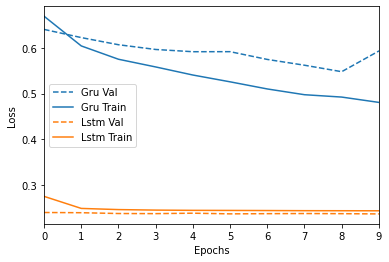

In [ ]:
plot_history([('GRU', GRU_history), ('LSTM', LSTM_history)])